In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
df = pd.read_csv('user_behavior_dataset.csv')

In [176]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [177]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [178]:
df.shape

(700, 11)

In [179]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [180]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'App Usage Time (min/day)'}>,
        <Axes: title={'center': 'Screen On Time (hours/day)'}>],
       [<Axes: title={'center': 'Battery Drain (mAh/day)'}>,
        <Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage (MB/day)'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'User Behavior Class'}>, <Axes: >]],
      dtype=object)

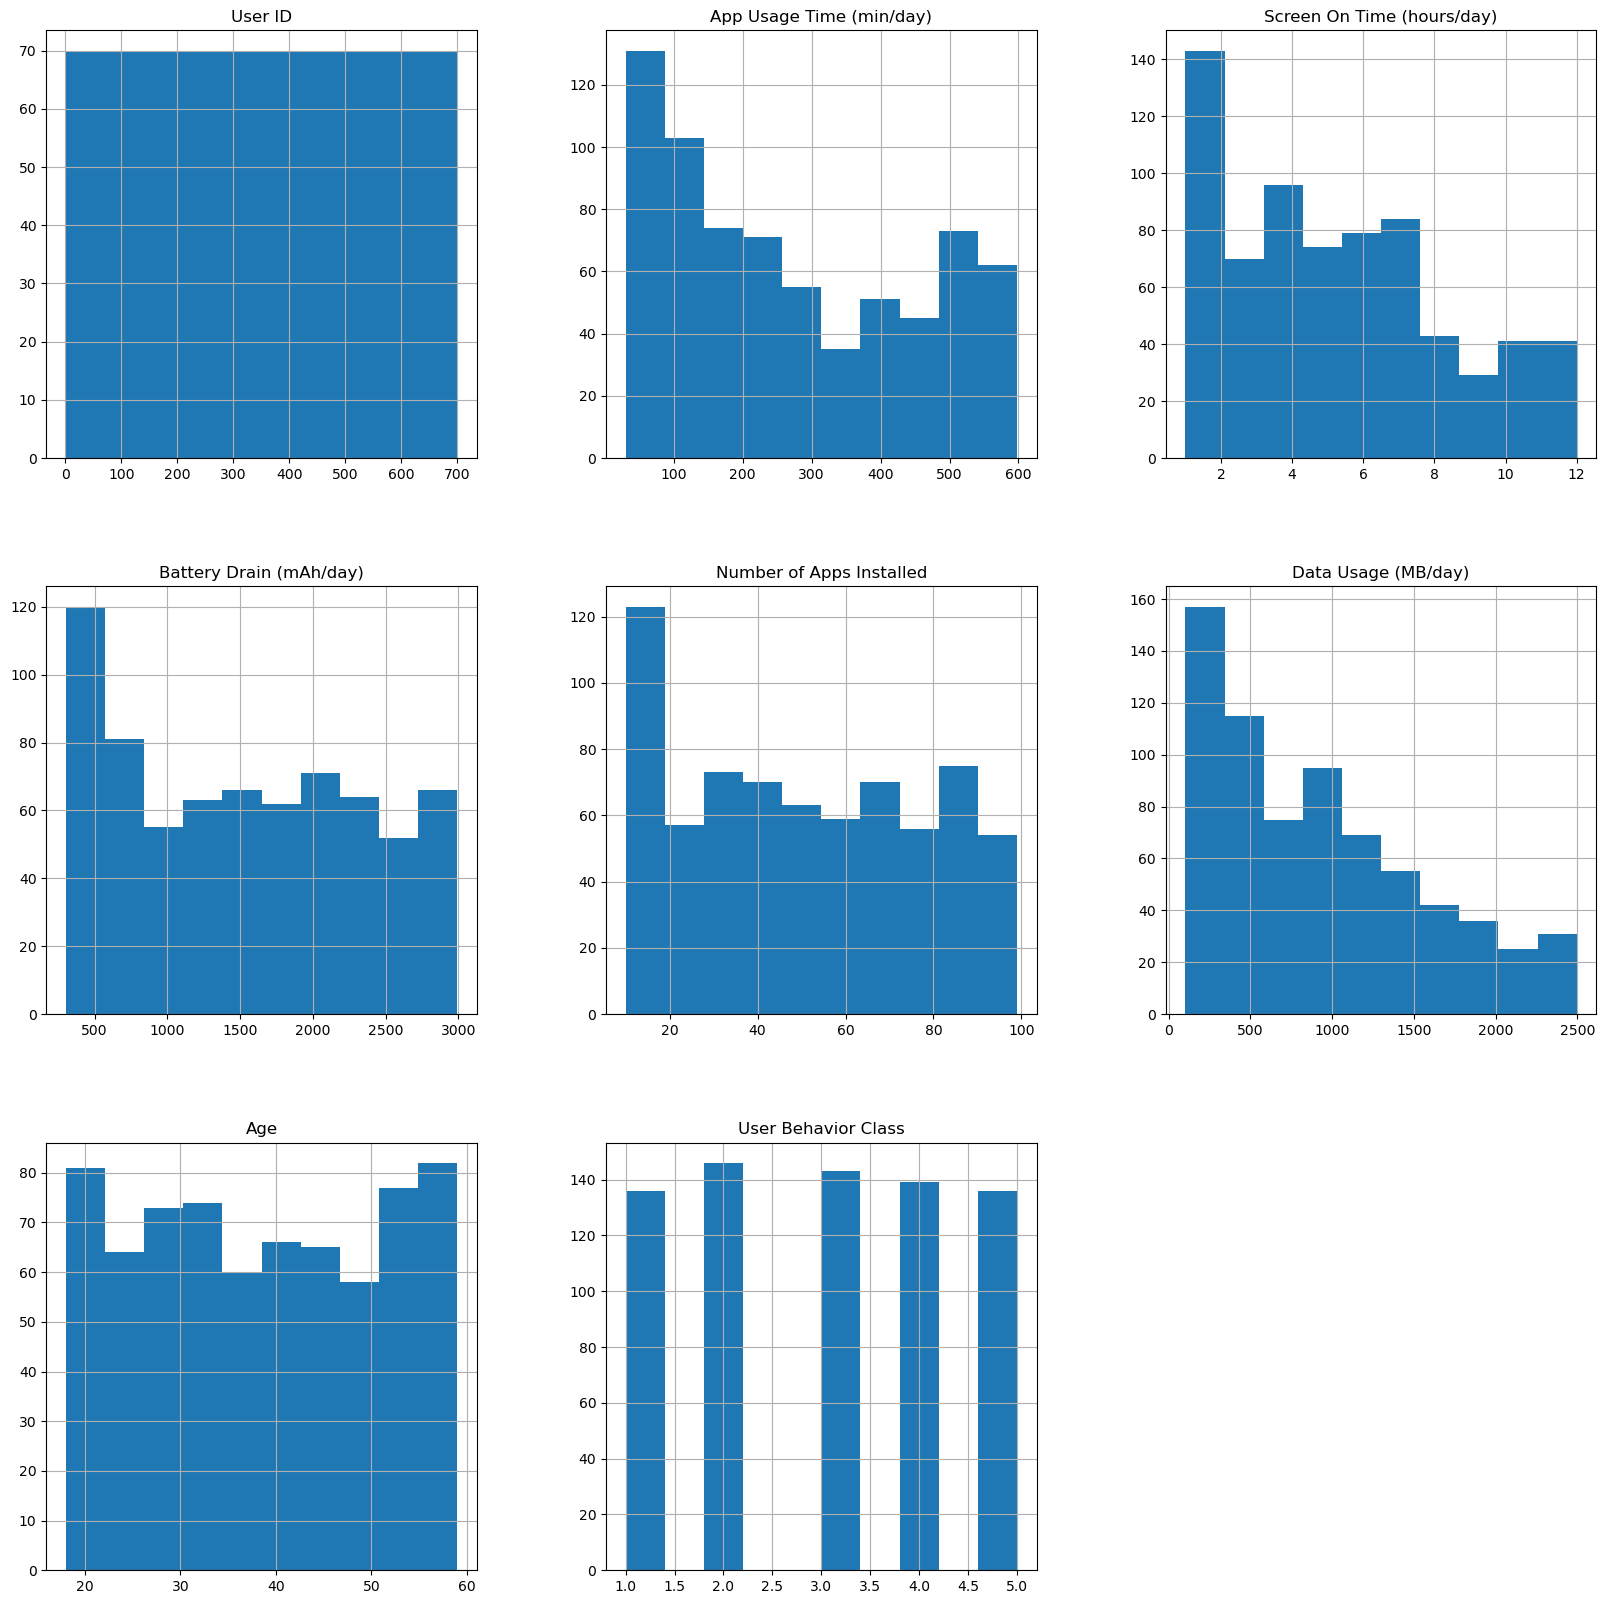

In [181]:
df.hist(figsize = (20,20))

In [182]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

Balanced Dataset

In [183]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [184]:
df_objects = df.select_dtypes(include=['object']).columns

In [185]:
df_objects

Index(['Device Model', 'Operating System', 'Gender'], dtype='object')

In [186]:
df.drop(df[df_objects], axis=1, inplace=True)

In [187]:
df.drop('User ID', axis=1,  inplace=True)

In [188]:
df.corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


<Axes: >

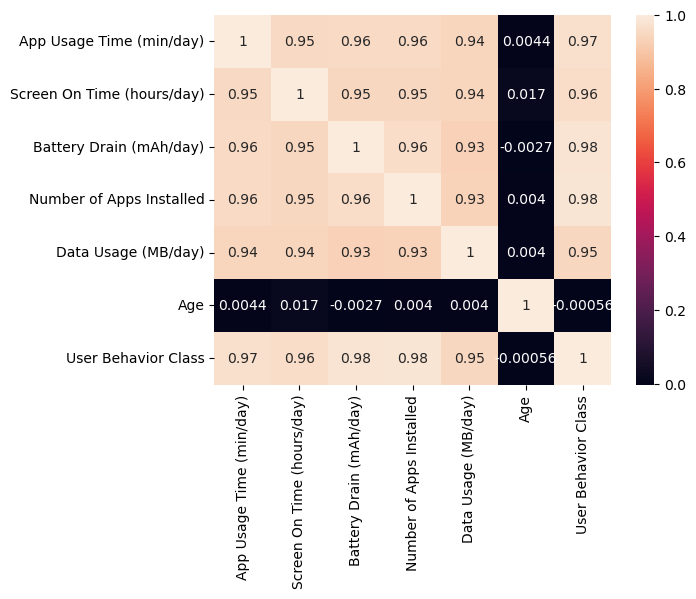

In [189]:
sns.heatmap(df.corr(), annot=True)

In [190]:
# Split data into independent and dependent dataset
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']

In [191]:
X

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
0,393,6.4,1872,67,1122,40
1,268,4.7,1331,42,944,47
2,154,4.0,761,32,322,42
3,239,4.8,1676,56,871,20
4,187,4.3,1367,58,988,31
...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22
696,316,6.8,1965,68,1201,59
697,99,3.1,942,22,457,50
698,62,1.7,431,13,224,44


In [192]:
y

0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42) 

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
ss = StandardScaler()

In [197]:
X_train =ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [198]:
X_train

array([[-1.3364773 , -1.06338729, -1.28762388, -1.20576179, -1.22888211,
        -1.36856123],
       [ 0.2344321 ,  0.6845706 ,  0.74183247,  0.47995936,  0.6759755 ,
         0.720086  ],
       [-1.24177709, -1.35471361, -1.37771373, -1.27905401, -1.20732349,
         0.63654011],
       ...,
       [ 0.85833938,  0.39324428,  0.53852161,  0.99300493,  0.50658638,
         1.22136133],
       [-0.92982345, -0.61021303, -0.8870893 , -1.09582345, -0.72379456,
        -0.36601056],
       [-0.545452  , -0.90153934, -0.72760593, -0.50948566, -0.57288426,
        -0.53310234]])

In [199]:
X_test

array([[ 0.17872609,  0.39324428,  1.03279832,  1.02965104,  0.85614392,
         1.05426955],
       [-1.14707688, -1.28997443, -1.40936691, -1.35234624, -1.14264765,
        -0.53310234],
       [-1.08022967, -1.35471361, -1.32658165, -1.35234624, -1.2227225 ,
        -0.95083178],
       ...,
       [ 1.24271083,  1.17011446,  1.61716488,  1.46940439,  1.86785892,
        -0.61664823],
       [ 1.12015761,  0.84641855,  0.93175161,  0.40666714,  0.823806  ,
         0.46944833],
       [-0.05523914,  0.10191797, -0.04584495,  0.2967288 , -0.47587049,
         1.30490722]])

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
lr = LogisticRegression()

In [202]:
lr.fit(X_train, y_train)

LogisticRegression()

In [203]:
y_pred = lr.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score

In [205]:
print(accuracy_score(y_test, y_pred))

1.0


In [206]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [207]:
y_pred = svm.predict(X_test)

In [208]:
print(accuracy_score(y_test, y_pred))

1.0


In [209]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [210]:
y_pred = gnb.predict(X_test)

In [211]:
print(accuracy_score(y_test, y_pred))

1.0


In [235]:
print(l.predict(ss.transform([[393, 6.7, 1872, 67, 1122, 44]])))

[4]


C:\Users\rpcha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
